### Student Information
Name:劉政諺

Student ID:b1123088

GitHub ID:ericliuhaha

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__.

### Second Phase Submission

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__.

# Phase 1

In [ ]:
### Begin Assignment Here

In [ ]:
!pip3 install PAMI

In [5]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
datapath="/content/newdataset/Reddit-stock-sentiment.csv"

In [7]:
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

display(df.head())

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [19]:
print(df.columns)
print()
print('total is:',df.shape[1])

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

total is: 16


In [20]:
len(df)

847

In [22]:
print(df['title'][0])
print(df['title'][1])
print(df['title'][2])

Retardation is on the menu boys! WSB is so back
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?


In [31]:
list(df['label'][0:10])

[-1.0, 0.0, 0.0, 1.0, -1.0, 0.0, -1.0, 0.0, 1.0, 1.0]

In [39]:
for index in range(10):
    print("\n".join(df['text'][index].split("\n")))
    print()
    print("-------------------------next----------------------------")
    print()

Calls on retards

-------------------------next----------------------------

Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

-------------------------next----------------------------

Seeing lots of red in the ticker.

-------------------------next----------------------------

Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.

**Highlight Main Points**

* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.
* The feat highlights the power of electric boating and pushes the limits of innovation.
* Partners like Octillion Power Systems and D

In [40]:
# add nothing to the dataframe
df['nothing'] = len(df)*[0]

In [44]:
df[:10][["text","title","label"]]

,text,title,label
0,Calls on retards,Retardation is on the menu boys! WSB is so back,-1.0
1,Stunt as in like why did they even make a big ...,Retail giant TARGET has now declined for 10 co...,0.0
2,Seeing lots of red in the ticker.,How do you feel about a sitting president maki...,0.0
3,Vision Marine Technologies Inc. is rewriting t...,Who knows more? $VMAR,1.0
4,He didn’t say thank you.,The Trump administration is begging Xi Jinping...,-1.0
5,"Hoping to ejaculate in wet warm puss tonight, ...",Weekend Discussion Thread for the Weekend of A...,0.0
6,Trump will respond to china increasing their t...,Is the market in complete denial right now?,-1.0
7,Confirmed not a trap. Its been like this for p...,Retardation is on the menu boys! WSB is so back,0.0
8,Am I the only one seeing the cup & handle brea...,"It's fucking awful seeing the ""Silver"" misinfo...",1.0
9,HLGN is $10. Hurry and catch it now before it ...,Any cheap stocks under $10?,1.0


In [48]:
df.loc[:10, 'text']

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.
3,Vision Marine Technologies Inc. is rewriting t...
4,He didn’t say thank you.
5,"Hoping to ejaculate in wet warm puss tonight, ..."
6,Trump will respond to china increasing their t...
7,Confirmed not a trap. Its been like this for p...
8,Am I the only one seeing the cup & handle brea...
9,HLGN is $10. Hurry and catch it now before it ...


In [49]:
df.iloc[:10, 0]

,type
0,comment
1,comment
2,comment
3,post
4,comment
5,comment
6,comment
7,comment
8,comment
9,comment


In [50]:
df.isnull()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [53]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

#found downvotes,upvote_ratio has

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0,0


In [55]:
print(df['downvotes'].unique())
print(df['upvote_ratio'].unique())


[nan  0.  4. 11.  1.]
[ nan 0.98 1.   0.95 0.92 0.91 0.99 0.93 0.5  0.84]


In [56]:
df['downvotes'].value_counts()

,count
downvotes,
0.0,60
1.0,2
4.0,1
11.0,1


In [57]:
df['upvote_ratio'].value_counts()

,count
upvote_ratio,
1.00,52
0.91,3
0.98,2
0.99,2
0.95,1
0.92,1
0.93,1
0.50,1
0.84,1


In [64]:
df['downvotes'] = df['downvotes'].fillna(float(0.0))
df['upvote_ratio'] = df['upvote_ratio'].fillna(float(1.00))

In [62]:
sum(df.duplicated())

0

In [67]:
df_sample = df.sample(n=len(df)//2) # Sample all rows

In [68]:
len(df_sample)

423

In [ ]:
df_sample[0:4]

In [72]:
df_sample.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Category distribution'}, xlabel='label'>

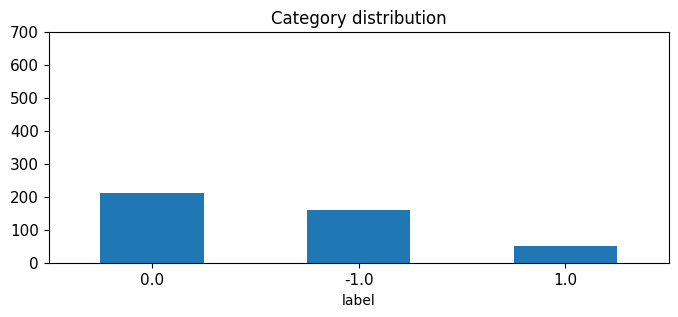

In [77]:
import matplotlib.pyplot as plt

df_sample['label'].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

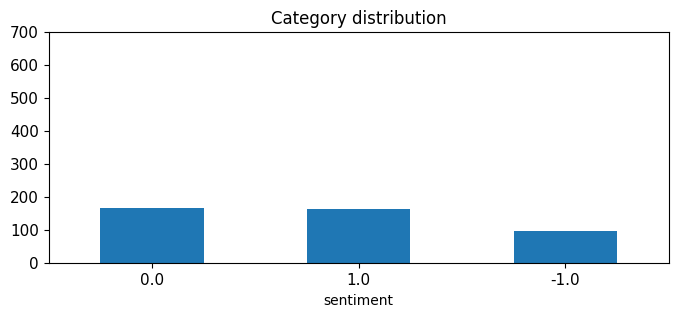

In [78]:
df_sample['sentiment'].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],
                                    rot = 0, fontsize = 11, figsize = (8,3))

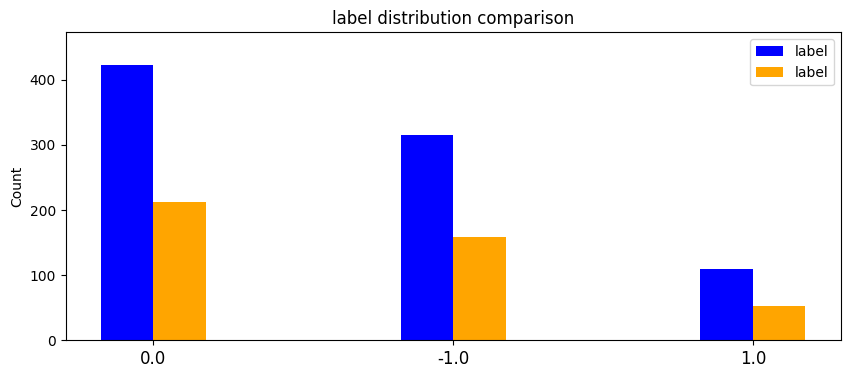

In [79]:
# 取 category 名稱
categories = df['label'].value_counts().index

# 兩組資料的 counts
counts_X = df['label'].value_counts().reindex(categories)
counts_X_sample = df_sample['label'].value_counts().reindex(categories)

# x 軸位置
x = np.arange(len(categories))
width = 0.35  # 柱寬

fig, ax = plt.subplots(figsize=(10,4))
# 畫兩組柱狀圖
rects1 = ax.bar((x - width/4), counts_X, width/2, label='label', color='blue')
rects2 = ax.bar((x + width/4), counts_X_sample, width/2, label='label', color='orange')

# 加標題、x軸標籤
ax.set_ylabel('Count')
ax.set_title('label distribution comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0, fontsize=12)
ax.set_ylim(0, max(counts_X.max(), counts_X_sample.max()) + 50)
ax.legend()

plt.show()

In [80]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [82]:
df[0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,nothing
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,0.0,1.00,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,0.0,1.00,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,0.0,1.00,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,0.0,1.00,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,0


In [84]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [85]:
df['unigrams']

,unigrams
0,"[Calls, on, retards]"
1,"[Stunt, as, in, like, why, did, they, even, ma..."
2,"[Seeing, lots, of, red, in, the, ticker, .]"
3,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,"[He, didn, ’, t, say, thank, you, .]"
...,...
842,"[Invest, now, it, is, going, to, shoot, up, to..."
843,"[Where, can, I, read, this, ?]"
844,"[Upgrades, ,, Downgrades, [, Stock, Analyst, R..."
845,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


In [110]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['text']) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [111]:
# Display the learned vocabulary
print("Vocabulary:")
print(count_vect.vocabulary_)

# Display the shape of the document-term matrix
print("\nShape of the document-term matrix:")
print(df_counts.shape)


#???????應該沒錯

Vocabulary:
{'calls': 692, 'on': 2706, 'retards': 3248, 'stunt': 3696, 'as': 388, 'in': 2024, 'like': 2310, 'why': 4244, 'did': 1168, 'they': 3858, 'even': 1409, 'make': 2402, 'big': 538, 'deal': 1083, 'about': 175, 'starting': 3628, 'it': 2161, 'the': 3848, 'first': 1568, 'place': 2878, 'no': 2645, 'company': 887, 'should': 3477, 'ever': 1412, 'talk': 3795, 'politics': 2918, 'seeing': 3386, 'lots': 2370, 'of': 2687, 'red': 3150, 'ticker': 3888, 'vision': 4145, 'marine': 2422, 'technologies': 3823, 'inc': 2026, 'is': 2149, 'rewriting': 3263, 'watercraft': 4190, 'rulebook': 3313, 'their': 3849, 'collaboration': 856, 'with': 4271, 'shaun': 3437, 'torrente': 3930, 'has': 1837, 'achieved': 195, 'unthinkable': 4066, 'blazing': 560, '116': 18, 'mph': 2560, 'water': 4189, 'this': 3866, 'isn': 2154, 'just': 2197, 'speed': 3585, 'propelling': 3014, 'electric': 1329, 'boating': 576, 'into': 2117, 'new': 2622, 'era': 1388, 'cutting': 1054, 'edge': 1303, 'technology': 3824, 'combined': 863, 'skill

In [112]:
count_vect.get_feature_names_out()[4300]

'wouldn'

In [113]:
count_vect.get_feature_names_out()[4300]

'wouldn'

In [114]:
df_counts.shape

(847, 4346)

In [115]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [116]:
import numpy as np

arr = df_counts[0:5, 0:100].toarray()

positions = np.argwhere(arr == 1)

# Get the feature names (words) from the CountVectorizer
feature_names = count_vect.get_feature_names_out()

# Map the column indices from the positions to the feature names
positions_words = [(row, feature_names[col]) for row, col in positions]

print("Positions of '1' and corresponding words (row, word):")
print(positions_words)

Positions of '1' and corresponding words (row, word):
[]


In [118]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [119]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

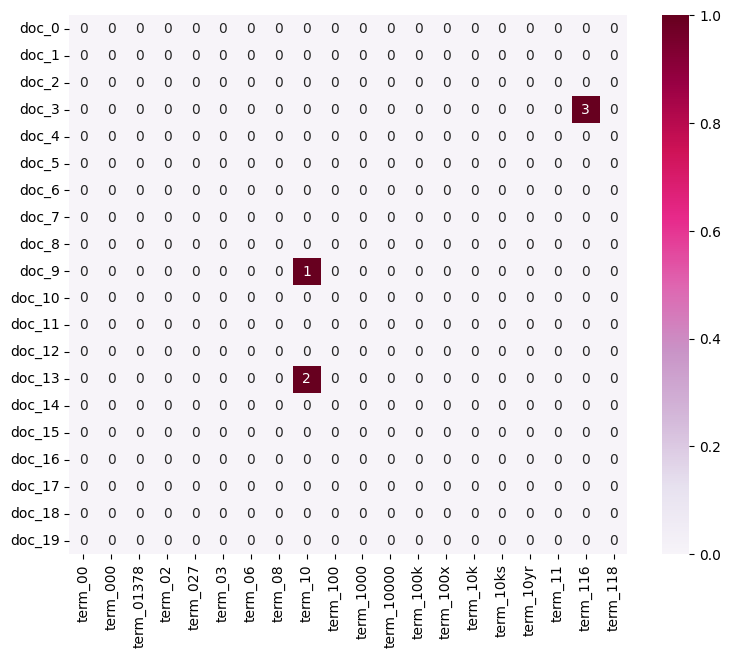

In [120]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

出現頻率最高的 10 個詞：
116: 3
10: 3
11: 0
118: 0
10yr: 0
10ks: 0
100x: 0
10k: 0
100k: 0
10000: 0
前 10 篇文檔的詞數： [  3  26   7 155   5  11  49  21  34  14]
矩陣密度: 0.004671 (非零元素比例)


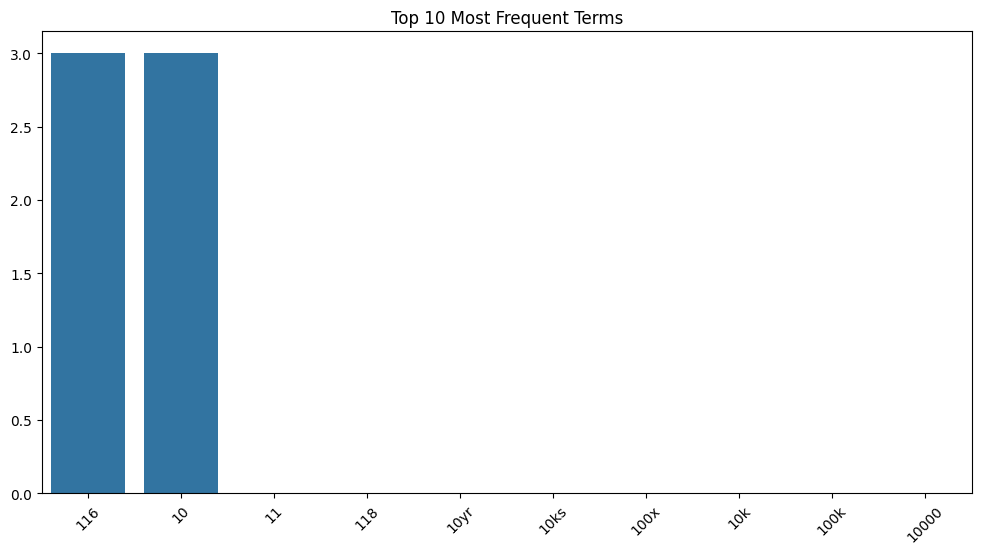

In [121]:
import numpy as np

# 對所有文檔計算每個詞的出現次數總和
term_frequencies = np.array(df_counts[0:20, 0:20].sum(axis=0)).flatten()

# 找出出現最多的前 10 個詞
top_terms_idx = term_frequencies.argsort()[::-1][:10]
top_terms = count_vect.get_feature_names_out()[top_terms_idx]
top_counts = term_frequencies[top_terms_idx]

print("出現頻率最高的 10 個詞：")
for t, c in zip(top_terms, top_counts):
    print(f"{t}: {c}")
# 每篇文檔總詞數
doc_lengths = np.array(df_counts.sum(axis=1)).flatten()

# 顯示前 10 篇文檔的詞數
print("前 10 篇文檔的詞數：", doc_lengths[:10])
density = df_counts.nnz / (df_counts.shape[0] * df_counts.shape[1])
print(f"矩陣密度: {density:.6f} (非零元素比例)")
top_terms_idx = term_frequencies.argsort()[::-1][:50]  # 前 50 高頻詞
subset_sparse = df_counts[:, top_terms_idx]  # 整個文檔，僅這些詞
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=top_terms, y=top_counts)
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Terms")
plt.show()


In [122]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))


In [123]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [124]:
term_frequencies[0]

np.int64(4)

/tmp/ipython-input-1135719481.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


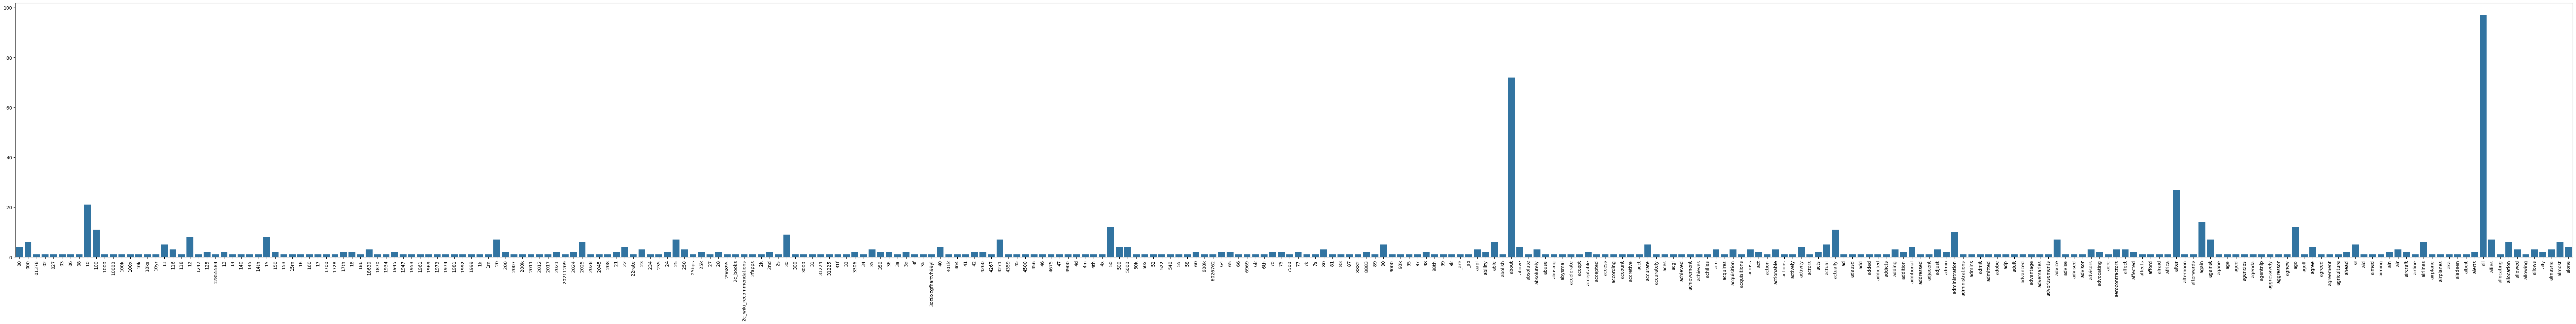

In [125]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [126]:
# Answer here
import plotly.express as px

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
top_n = 300
terms = count_vect.get_feature_names_out()[:top_n]
counts = term_frequencies[:top_n]

# Plotly 互動柱狀圖
fig = px.bar(x=terms, y=counts,
             labels={'x':'Terms', 'y':'Frequency'},
             title=f"Top {top_n} Terms Frequency")
fig.update_layout(xaxis_tickangle=-90, width=1500, height=600)
fig.show()

/tmp/ipython-input-1588227194.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



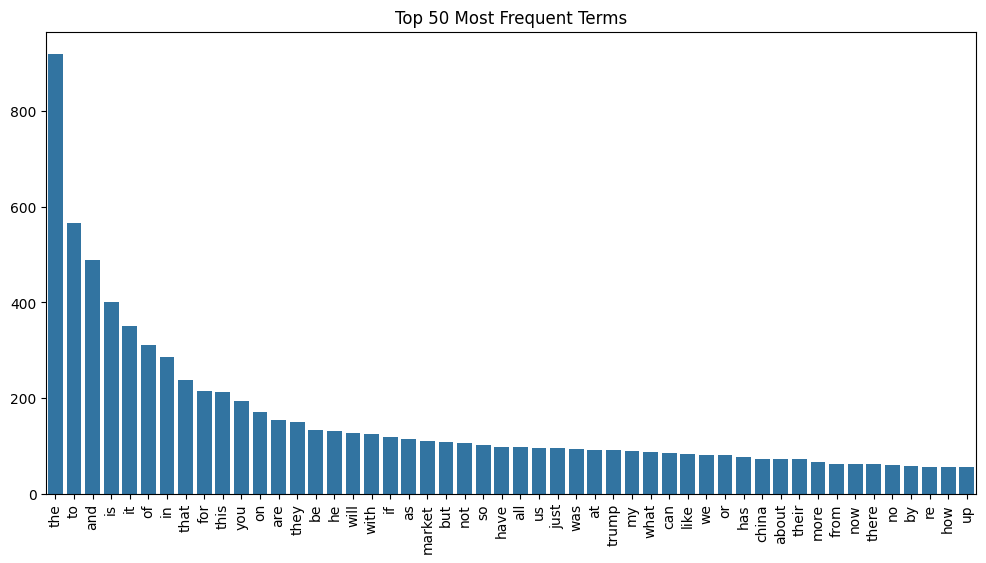

In [128]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# 取出前 50 高頻詞
top_n = 50
top_idx = term_frequencies.argsort()[::-1][:top_n]
top_terms = count_vect.get_feature_names_out()[top_idx]
top_counts = term_frequencies[top_idx]

# 畫柱狀圖
plt.figure(figsize=(12, 6))
g = sns.barplot(x=top_terms, y=top_counts)
g.set_xticklabels(top_terms, rotation=90)
plt.title(f"Top {top_n} Most Frequent Terms")
plt.show()


/tmp/ipython-input-525060673.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



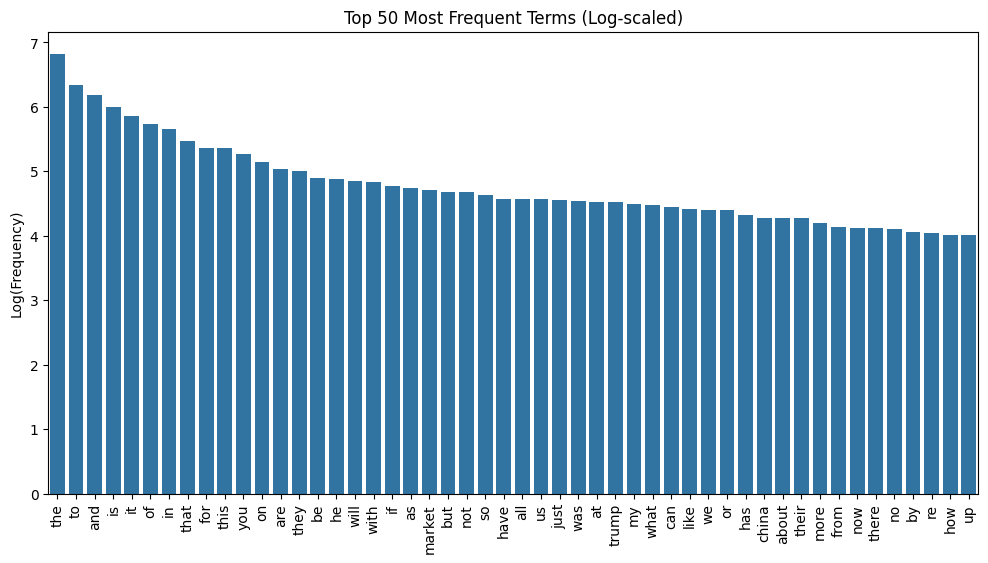

In [129]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 計算每個詞的總出現頻率
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

top_n=50
top_idx = term_frequencies.argsort()[::-1][:top_n]
top_terms = count_vect.get_feature_names_out()[top_idx]
top_counts = term_frequencies[top_idx]

# 對數轉換，避免 log(0)
top_counts_log = [math.log(i) for i in top_counts]

# 畫對數頻率柱狀圖
plt.figure(figsize=(12, 6))
g = sns.barplot(x=top_terms, y=top_counts_log)
g.set_xticklabels(top_terms, rotation=90)
plt.title(f"Top {top_n} Most Frequent Terms (Log-scaled)")
plt.ylabel("Log(Frequency)")
plt.show()


# Phase 2

In [ ]:
### Begin Assignment Here